<a href="https://colab.research.google.com/github/demekeendalie/Fine-tuning-bert-model-for-amharic-news-classification/blob/main/fastText_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

In [2]:
import os
dataset_path = 'C:/Users/E-MaxPCShop/Desktop/Uzbek_News_Dataset_small_stem'

data = []
for category in os.listdir(dataset_path):
    category_path = os.path.join(dataset_path, category)
    print(category_path)
    # Check if it's a directory (category folder)
    if os.path.isdir(category_path):
        for filename in os.listdir(category_path):
            if filename.endswith('.txt'):
                file_path = os.path.join(category_path, filename)
                try:
                    with open(file_path, 'r', encoding='utf-8') as file:
                        article_text = file.read().strip()  # Read and remove leading/trailing spaces
                        data.append({'articles': article_text, 'category': category})
                except Exception as e:
                    print(f"Error reading file {file_path}: {e}")

dataframe = pd.DataFrame(data)

C:/Users/E-MaxPCShop/Desktop/Uzbek_News_Dataset_small_stem\Avto
C:/Users/E-MaxPCShop/Desktop/Uzbek_News_Dataset_small_stem\Ayollar
C:/Users/E-MaxPCShop/Desktop/Uzbek_News_Dataset_small_stem\Iqtisodiyot
C:/Users/E-MaxPCShop/Desktop/Uzbek_News_Dataset_small_stem\Jinoyat
C:/Users/E-MaxPCShop/Desktop/Uzbek_News_Dataset_small_stem\Madaniyat
C:/Users/E-MaxPCShop/Desktop/Uzbek_News_Dataset_small_stem\Pazandachilik
C:/Users/E-MaxPCShop/Desktop/Uzbek_News_Dataset_small_stem\processed_articles.csv
C:/Users/E-MaxPCShop/Desktop/Uzbek_News_Dataset_small_stem\Qonunchilik
C:/Users/E-MaxPCShop/Desktop/Uzbek_News_Dataset_small_stem\Salomatlik
C:/Users/E-MaxPCShop/Desktop/Uzbek_News_Dataset_small_stem\Siyosat
C:/Users/E-MaxPCShop/Desktop/Uzbek_News_Dataset_small_stem\Sport
C:/Users/E-MaxPCShop/Desktop/Uzbek_News_Dataset_small_stem\Texnologiya


In [3]:
print(dataframe)
category_counts = dataframe['category'].value_counts()
print(category_counts)


                                                 articles     category
0       tesla barcha elektromobil narx osh o‘zbekiston...         Avto
1       uzauto motors o‘rindiq isi mode va magnitafon ...         Avto
2       lego‘ ming ortiq deta yordam to‘liq o‘lcham fe...         Avto
3       naman moskvich ariq ag‘dar ket oqibat bir kish...         Avto
4       qo‘qon ypx xodim mashina ust sudra ket haydovc...         Avto
...                                                   ...          ...
102955  sony mm qalinlik yangi xperia t smartfon taqdi...  Texnologiya
102956  acer kompaniya yangi iconia a planshet olmaota...  Texnologiya
102957  lg g ommaboplik samsu galaxy s’n ort qol janub...  Texnologiya
102958  vertu kompaniya ming yevrolik titan smartfon c...  Texnologiya
102959  apple yangi ios operatsion tizim taqdim et app...  Texnologiya

[102960 rows x 2 columns]
Texnologiya      17541
Qonunchilik      14779
Sport            13403
Madaniyat        12798
Siyosat          12247
Iqtiso

In [4]:
# changing category to numeric
label=pd.Categorical(dataframe['category']).codes
label=pd.DataFrame(label)
dataframe['labels']=pd.DataFrame(label)
print(dataframe)

unique_category_labels = dataframe[['category', 'labels']].drop_duplicates()
print(unique_category_labels)

                                                 articles     category  labels
0       tesla barcha elektromobil narx osh o‘zbekiston...         Avto       0
1       uzauto motors o‘rindiq isi mode va magnitafon ...         Avto       0
2       lego‘ ming ortiq deta yordam to‘liq o‘lcham fe...         Avto       0
3       naman moskvich ariq ag‘dar ket oqibat bir kish...         Avto       0
4       qo‘qon ypx xodim mashina ust sudra ket haydovc...         Avto       0
...                                                   ...          ...     ...
102955  sony mm qalinlik yangi xperia t smartfon taqdi...  Texnologiya      10
102956  acer kompaniya yangi iconia a planshet olmaota...  Texnologiya      10
102957  lg g ommaboplik samsu galaxy s’n ort qol janub...  Texnologiya      10
102958  vertu kompaniya ming yevrolik titan smartfon c...  Texnologiya      10
102959  apple yangi ios operatsion tizim taqdim et app...  Texnologiya      10

[102960 rows x 3 columns]
            category  lab

In [5]:
del dataframe['category']

In [6]:
# sheffule the dataset
dataframe=dataframe.sample(frac=1)

In [7]:
#normalizarion
import re
#method to normalize character level missmatch such as ጸሀይ and ፀሐይ
def normalization(input_token):
    rep1=re.sub('[ሃኅኃሐሓኻ]','ሀ',input_token)
    rep2=re.sub('[ሑኁዅ]','ሁ',rep1)

    return rep2

In [8]:
# apply normalization and special characters removal
# dataframe['articles']=dataframe['articles'].apply(lambda x: normalization(x))

In [9]:
# special symbol removal
print(dataframe)
# dataframe['articles']=dataframe['articles'].str.replace('[^\w\s]','',regex=True)
dataframe['articles']=dataframe['articles'].str.replace("O'",'O‘',regex=True)
dataframe['articles']=dataframe['articles'].str.replace("G'",'G‘',regex=True)
dataframe['articles']=dataframe['articles'].str.replace("o'",'o‘',regex=True)
dataframe['articles']=dataframe['articles'].str.replace("g'",'g‘',regex=True)
dataframe['articles']=dataframe['articles'].str.replace('O`','O‘',regex=True)
dataframe['articles']=dataframe['articles'].str.replace('G`','G‘',regex=True)
dataframe['articles']=dataframe['articles'].str.replace('o`','o‘',regex=True)
dataframe['articles']=dataframe['articles'].str.replace('g`','g‘',regex=True)
dataframe['articles']=dataframe['articles'].str.replace("[^\w\s‘’`']",'',regex=True)
dataframe['articles'] = dataframe['articles'].str.replace('\n\n', '. ', regex=False)
dataframe['articles'] = dataframe['articles'].str.replace('\n', '. ', regex=False)

print(dataframe)

                                                 articles  labels
84808   frank kessie barselona o‘tadi bo‘l futbolchi k...       9
2664    u tez yet ol qaror qil peterburglik qiz mashin...       0
70710   mudofaa vazirlig rossiya bilan hamkorlik dastu...       8
92849   mevasabzavot yet mumkin bo‘l elektrok namoyish...      10
51541   boʻlgʻu huquqbuzar yoz ravishda ogohlantir huq...       6
...                                                   ...     ...
80343   superl neftchi derb g‘alaba qozo olimpik va su...       9
31757   london charlz darvin yil chop et kitob mln dol...       4
102515  qon alkogo miqdor aniq beruvchi qurilma konsep...      10
81096   real madrid gol shous osasuna mag‘lubiyat uchr...       9
54578   tovarxomashyo birja fyuchers savdo joriy qil h...       6

[102960 rows x 2 columns]
                                                 articles  labels
84808   frank kessie barselona o‘tadi bo‘l futbolchi k...       9
2664    u tez yet ol qaror qil peterburglik qiz m

In [10]:
# removing digits from the dataset
dataframe['articles']=dataframe['articles'].str.replace('\d+','',regex=True)

In [11]:
# drawing density graph

In [12]:
#formating the dataset to the fasttext format __label___ data
dataframe['formatted']="__label__"+dataframe['labels'].astype(str)+" "+dataframe['articles']

In [13]:
dataframe.head(3)

,articles,labels,formatted
84808,frank kessie barselona o‘tadi bo‘l futbolchi k...,9,__label__9 frank kessie barselona o‘tadi bo‘l ...
2664,u tez yet ol qaror qil peterburglik qiz mashin...,0,__label__0 u tez yet ol qaror qil peterburglik...
70710,mudofaa vazirlig rossiya bilan hamkorlik dastu...,8,__label__8 mudofaa vazirlig rossiya bilan hamk...


In [14]:
# train test spliting and taking only the formated column
from sklearn.model_selection import train_test_split
train, test=train_test_split(dataframe['formatted'], test_size=0.2)

In [15]:
train.shape, test.shape

((82368,), (20592,))

In [16]:
# save the training and testing data
train.to_csv("news.train",header=False,index=False)
test.to_csv("news.test",header=False,index=False)

In [17]:
# !pip install fasttext-wheel

In [18]:
import fasttext as ft

In [19]:
# training the model
model=ft.train_supervised(input="news.train",loss='softmax',epoch=100, verbose=True)

In [20]:
# testing the model
predict=model.test("news.test")

In [21]:
print(predict)

(20592, 0.9257478632478633, 0.9257478632478633)


Accuracy: 0.9257478632478633
Precision: 0.9257769749003698
Recall: 0.9257478632478633
F1 Score: 0.9256951010402197
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.86      0.84      1154
           1       0.83      0.77      0.80       537
          10       0.91      0.91      0.91      3565
           2       0.86      0.85      0.85      2409
           3       0.96      0.97      0.96       857
           4       0.97      0.96      0.96      2576
           5       0.99      0.97      0.98       376
           6       0.98      0.99      0.99      2979
           7       0.85      0.88      0.87       985
           8       0.90      0.91      0.91      2451
           9       0.99      0.98      0.98      2703

    accuracy                           0.93     20592
   macro avg       0.92      0.91      0.91     20592
weighted avg       0.93      0.93      0.93     20592



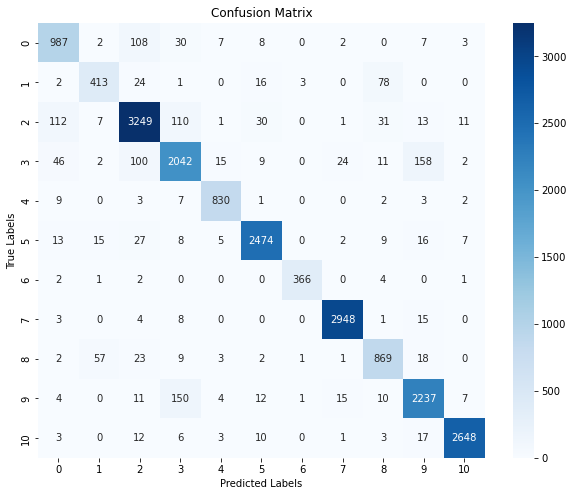

Confusion Matrix:
[[ 987    2  108   30    7    8    0    2    0    7    3]
 [   2  413   24    1    0   16    3    0   78    0    0]
 [ 112    7 3249  110    1   30    0    1   31   13   11]
 [  46    2  100 2042   15    9    0   24   11  158    2]
 [   9    0    3    7  830    1    0    0    2    3    2]
 [  13   15   27    8    5 2474    0    2    9   16    7]
 [   2    1    2    0    0    0  366    0    4    0    1]
 [   3    0    4    8    0    0    0 2948    1   15    0]
 [   2   57   23    9    3    2    1    1  869   18    0]
 [   4    0   11  150    4   12    1   15   10 2237    7]
 [   3    0   12    6    3   10    0    1    3   17 2648]]


In [22]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Load your test data (assuming it's formatted as FastText expects)
test_file = "news.test"  # Replace "news.test" with your actual test file

# Get predictions and true labels
y_true = []
y_pred = []

with open(test_file, "r") as f:
    for line in f:
        label = line.split(" ")[0].replace("__label__", "")
        text = " ".join(line.split(" ")[1:]).strip() # Remove extra spaces and newlines
#         text = text.replace('\n', ' ') # Replace internal newlines with spaces
        prediction = model.predict(text)[0][0].replace("__label__", "")

        y_true.append(label)
        y_pred.append(prediction)

# Calculate metrics
accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred, average="weighted", zero_division=0)
recall = recall_score(y_true, y_pred, average="weighted", zero_division=0)
f1 = f1_score(y_true, y_pred, average="weighted", zero_division=0)
report = classification_report(y_true, y_pred, zero_division=0)
cm = confusion_matrix(y_true, y_pred)

# Print metrics
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print(f"Classification Report:\n{report}")

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

print("Confusion Matrix:")
print(cm)

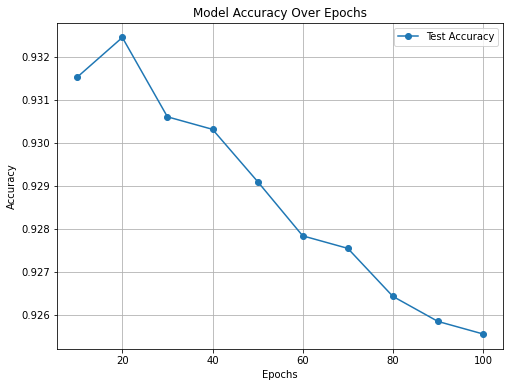

In [23]:
import matplotlib.pyplot as plt

# Lists to store accuracy values
epochs = list(range(10, 110, 10))  # Track every 10 epochs
# train_accuracies = []
test_accuracies = []

# Iteratively train and track accuracy
for epoch in epochs:
    model = ft.train_supervised(input="news.train", loss='softmax', epoch=epoch)
    
    # Track training accuracy
#     train_pred = model.test("news.train")
#     train_accuracies.append(train_pred[1])  # Accuracy value
    
    # Track test accuracy
    test_pred = model.test("news.test")
    test_accuracies.append(test_pred[1])  # Accuracy value

# Plot accuracy over epochs
plt.figure(figsize=(8, 6))
# plt.plot(epochs, train_accuracies, label='Training Accuracy', marker='o')
plt.plot(epochs, test_accuracies, label='Test Accuracy', marker='o')
plt.title('Model Accuracy Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend()
plt.show()